# <font color='27e2c7'>AN√ÅLISE DE DADOS ‚Äì B2W DIGITAL BIT SP / FRETE</font>

## Tabela de Conte√∫dos

[1. Informa√ß√µes](#1.-Informa√ß√µes)

[2. Dados](#2.-Dados)

[3. Visualiza√ß√µes](#3.-Visualiza√ß√µes)

* [3.1 Categ√≥ricas](#3.1-Categ√≥ricas)

* [3.2 Faturamentos](#3.2-Faturamentos)

* [3.3 Custos](#3.3-Custos)

* [3.4 Descontos](#3.4-Descontos)

* [3.5 Visitas & Vendas](#3.5-Visitas-&-Vendas)

[4. Estat√≠sticas](#4.-Estat√≠sticas)

[5. Quest√µes](#5.-Quest√µes)

[6. Dados externos](#6.-Dados-externos)

[7. Regress√£o linear](#7.-Regress√£o-linear)

* [7.1 Multicolinearidade](#7.1-Multicolinearidade)

* [7.2 Modelo](#7.2-Modelo)

## 1. Informa√ß√µes
[Retorna a Tabela de Conte√∫dos](#Tabela-de-Conte√∫dos)

**Objetivo:** Analisar vendas de e-commerce.

**Fonte dos dados**: B2W

**Descri√ß√£o das vari√°veis:**

| Vari√°vel | Descri√ß√£o | Tipo |  
|:---|:---|:---|
| mes | Ano - M√™s | Nominal |
|departamento | Nome do departamento | Nominal |
| uf | Estado da federa√ß√£o | Nominal |
| item | C√≥digo do item | Nominal |
| faturamento_produto | Faturamento do produto | Cont√≠nua |
| faturamento_frete | Faturamento do frete | Cont√≠nua |
| custo_produto | Custo do produto | Cont√≠nua |
| custo_frete | Custo do frete | Cont√≠nua |
| custo_mkt | Custo do marketing | Cont√≠nua |
| desconto_produto | Desconto no produto | Cont√≠nua | 
| desconto_frete | Desconto no frete | Cont√≠nua |
| visitas | N√∫mero de visitas | Discreta |
| vendas | N√∫mero de vendas | Discreta |

## 2. Dados
[Retorna a Tabela de Conte√∫dos](#Tabela-de-Conte√∫dos)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model # linear regression
import statsmodels.api as sm # stats

In [2]:
# import data
df = pd.read_csv("data/base_db.csv", sep=';')

In [3]:
print("Amostra da base de dados:")
df.sample(5)

Amostra da base de dados:


mes           departamento  uf  item  faturamento_produto  \
38   2018-07               Cadeiras  MT     3              97461.0   
101  2018-09  Maquinas Fotogr¬†ficas  MT     3             417100.0   
98   2018-09               Cadeiras  SP     3             166387.5   
19   2018-06  Maquinas Fotogr¬†ficas  MT     2             277400.0   
23   2018-06  Maquinas Fotogr¬†ficas  PE     3             262200.0   

     faturamento_frete  custo_produto  custo_frete  custo_mkt  \
38             17472.0        81900.0        19110      13650   
101             7760.0       339500.0         4850       8730   
98             31320.0       130500.0        26100      13050   
19                 0.0       262800.0         7300      13140   
23                 0.0       213900.0         7590       6210   

     desconto_produto  desconto_frete  visitas  vendas  
38            17199.0          4368.0     3479     286  
101               0.0             0.0     1963     147  
98            29362.5          3480.0    14042     443  
19                0.0         11680.0     1960     144  
23                0.0          8280.0     2891      68

In [4]:
print(f"A base de dados possui {df.shape[0]} linhas e {df.shape[1]} vari√°veis.")

A base de dados possui 108 linhas e 13 vari√°veis.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mes                  108 non-null    object 
 1   departamento         108 non-null    object 
 2   uf                   108 non-null    object 
 3   item                 108 non-null    int64  
 4   faturamento_produto  108 non-null    float64
 5   faturamento_frete    108 non-null    float64
 6   custo_produto        108 non-null    float64
 7   custo_frete          108 non-null    int64  
 8   custo_mkt            108 non-null    int64  
 9   desconto_produto     108 non-null    float64
 10  desconto_frete       108 non-null    float64
 11  visitas              108 non-null    int64  
 12  vendas               108 non-null    int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 11.1+ KB


* N√£o h√° valores nulos.

In [6]:
# correct typo
df.loc[df['departamento'] == 'Maquinas Fotogr\xa0ficas', 'departamento'] = 'M√°quinas Fotogr√°ficas'

In [7]:
print(f"Os dados referem-se aos:")
print(f"- meses: {df['mes'].unique().tolist()}.")
print(f"- departamentos: {df['departamento'].unique().tolist()}")
print(f"- estados: {df['uf'].unique().tolist()}")
print(f"- itens: {df['item'].unique().tolist()}")

Os dados referem-se aos:
- meses: ['2018-06', '2018-07', '2018-08', '2018-09'].
- departamentos: ['Bolas de Gude', 'Cadeiras', 'M√°quinas Fotogr√°ficas']
- estados: ['MT', 'PE', 'SP']
- itens: [1, 2, 3]


## 3. Visualiza√ß√µes 
[Retorna a Tabela de Conte√∫dos](#Tabela-de-Conte√∫dos)

### 3.1 Categ√≥ricas
[Retorna a Tabela de Conte√∫dos](#Tabela-de-Conte√∫dos)

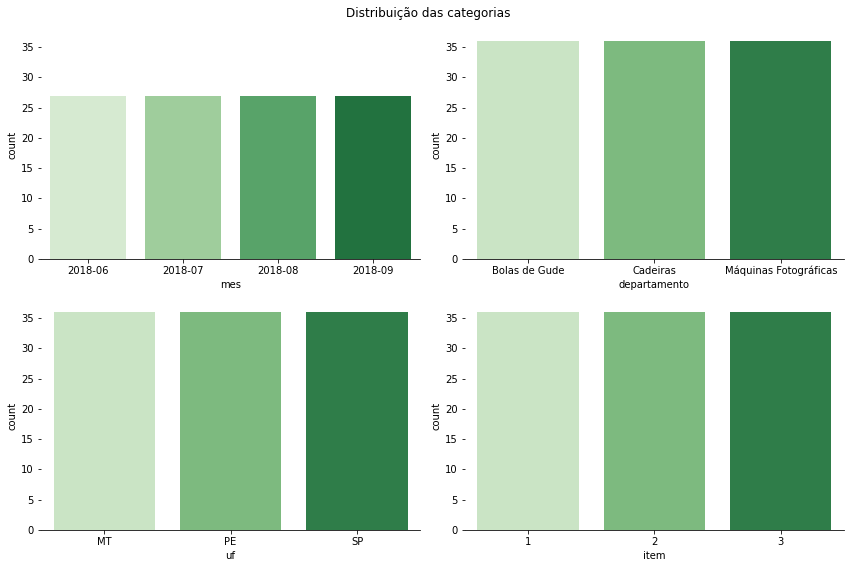

In [8]:
f, axes = plt.subplots(2, 2, figsize=(12, 8), sharey='col')
sns.despine(left=True)

sns.countplot(x="mes", data=df, ax=axes[0, 0],  palette="Greens")
sns.countplot(x="departamento", data=df, ax=axes[0, 1],  palette="Greens")
sns.countplot(x="uf", data=df, ax=axes[1, 0],  palette="Greens")
sns.countplot(x="item", data=df, ax=axes[1, 1],  palette="Greens")


# plt.setp(axes, yticks=[])
# plt.setp(axes, xticks=[])
plt.suptitle('Distribui√ß√£o das categorias')
plt.tight_layout()

* As vari√°veis 'mes', 'departamento', 'uf' e 'item' est√£o uniformemente distribu√≠das.

Text(0.5, 0.98, 'Vendas por m√™s')

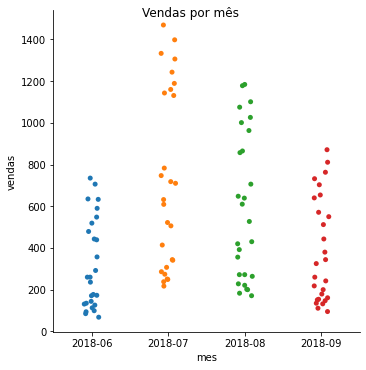

In [9]:
sns.catplot(x='mes', y='vendas', data=df)
plt.suptitle('Vendas por m√™s')

* Pico de vendas ocorreu em julho.

* Pode haver a influ√™ncia de algum tipo de sazonalidade, por exemplo f√©rias.

### 3.2 Faturamentos
[Retorna a Tabela de Conte√∫dos](#Tabela-de-Conte√∫dos)

In [10]:
from matplotlib.ticker import FuncFormatter

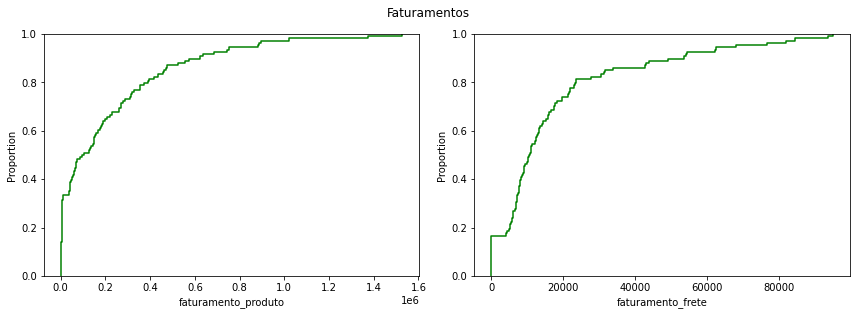

In [11]:
f, axes = plt.subplots(2, 2, figsize=(12, 8), sharey='col')
#sns.despine(left=True)

sns.ecdfplot(df['faturamento_produto'], ax=axes[0, 0],  color="green")
sns.ecdfplot(df['faturamento_frete'], ax=axes[0, 1],  color="green")

f.delaxes(ax=axes[1, 0])
f.delaxes(ax=axes[1, 1])

# xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
# g.set_xticklabels(xlabels)

# plt.setp(axes, yticks=[])
# plt.setp(axes, xticks=[])
plt.suptitle('Faturamentos')
plt.tight_layout()

* Cerca de 38% dos produtos gera um faturamento um pouco acima de zero.

* Cerca de 75% dos produtos gera um faturamento de frete de at√© 20000. Destes, 19% possui faturamento de at√© 5000.

### 3.3 Custos
[Retorna a Tabela de Conte√∫dos](#Tabela-de-Conte√∫dos)

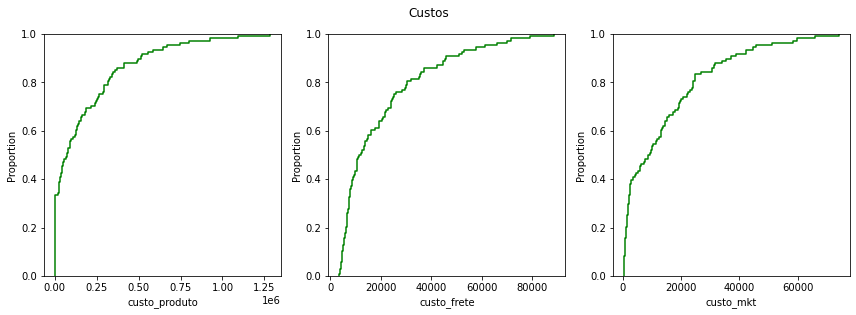

In [12]:
f, axes = plt.subplots(2, 3, figsize=(12, 8), sharey='col')
#sns.despine(left=True)

sns.ecdfplot(df['custo_produto'], ax=axes[0, 0],  color="green")
sns.ecdfplot(df['custo_frete'], ax=axes[0, 1],  color="green")
sns.ecdfplot(df['custo_mkt'], ax=axes[0, 2],  color="green")

f.delaxes(ax=axes[1, 0])
f.delaxes(ax=axes[1, 1])
f.delaxes(ax=axes[1, 2])

# xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
# g.set_xticklabels(xlabels)

# plt.setp(axes, yticks=[])
# plt.setp(axes, xticks=[])
plt.suptitle('Custos')
plt.tight_layout()

* Por volta de 38% dos produtos acumula custo zero.  

* 40% dos produtos tem um custo do frete de at√© 10000.

* O custo em marketing de 40% dos produtos √© um pouco maior do que zero.

### 3.4 Descontos
[Retorna a Tabela de Conte√∫dos](#Tabela-de-Conte√∫dos)

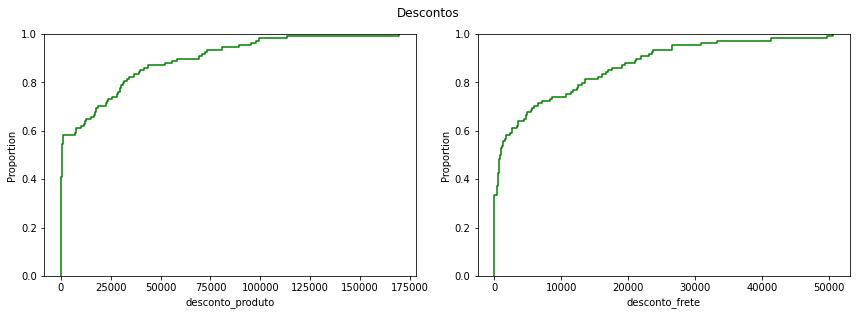

In [13]:
f, axes = plt.subplots(2, 2, figsize=(12, 8), sharey='col')
#sns.despine(left=True)

sns.ecdfplot(df['desconto_produto'], ax=axes[0, 0],  color="green")
sns.ecdfplot(df['desconto_frete'], ax=axes[0, 1],  color="green")

f.delaxes(ax=axes[1, 0])
f.delaxes(ax=axes[1, 1])

# plt.setp(axes, yticks=[])
# plt.setp(axes, xticks=[])
plt.suptitle('Descontos')
plt.tight_layout()

* 60% dos produtos possuem nenhum ou um pequeno desconto.

* Cerca de 35% dos produtos possuem nenhum ou um pequeno desconto no frete.

### 3.5 Visitas & Vendas
[Retorna a Tabela de Conte√∫dos](#Tabela-de-Conte√∫dos)

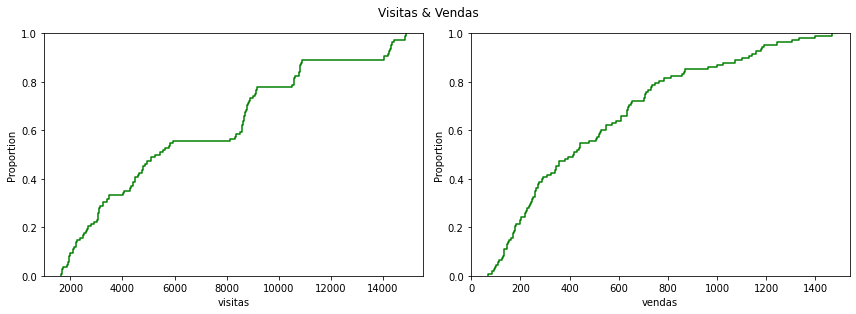

In [14]:
f, axes = plt.subplots(2, 2, figsize=(12, 8), sharey='col')
#sns.despine(left=True)

sns.ecdfplot(df['visitas'], ax=axes[0, 0],  color="green")
sns.ecdfplot(df['vendas'], ax=axes[0, 1],  color="green")

f.delaxes(ax=axes[1, 0])
f.delaxes(ax=axes[1, 1])

# plt.setp(axes, yticks=[])
# plt.setp(axes, xticks=[])
plt.suptitle('Visitas & Vendas')
plt.tight_layout()

Text(0.5, 0.98, 'Visitas x Vendas')

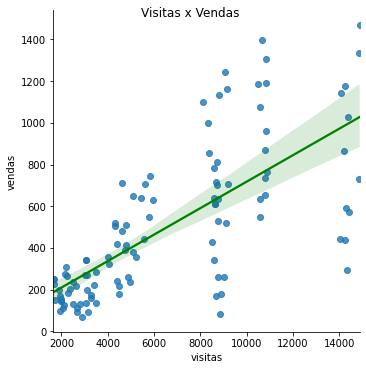

In [15]:
# linearity
sns.lmplot(x='visitas', y='vendas', data=df, line_kws={'color': 'green'})
plt.suptitle('Visitas x Vendas')

* Conforme aumenta o n√∫mero de visitas, aumenta o n√∫mero de vendas apesar de haver alguns *gaps*.

* A maior parte das visitas concentram-se em at√© 6000 com as vendas n√£o ultrapassando 600, ou seja, vendas 10 vezes menor do que o n√∫mero de visitas.

## 4. Estat√≠sticas
[Retorna a Tabela de Conte√∫dos](#Tabela-de-Conte√∫dos)

In [16]:
print('Descritiva das vari√°veis num√©ricas:')
df.iloc[:, 4:].describe()

Descritiva das vari√°veis num√©ricas:


faturamento_produto  faturamento_frete  custo_produto   custo_frete  \
count         1.080000e+02         108.000000   1.080000e+02    108.000000   
mean          2.175414e+05       17943.409259   1.751534e+05  19839.638889   
std           2.932318e+05       21241.771405   2.461311e+05  18550.861609   
min           1.977900e+03           0.000000   5.600000e+02   3470.000000   
25%           5.308125e+03        6091.200000   1.944750e+03   6715.750000   
50%           1.002930e+05       10580.000000   7.332000e+04  11770.000000   
75%           3.159056e+05       21438.000000   2.688500e+05  25560.000000   
max           1.527660e+06       94784.000000   1.283400e+06  88860.000000   

          custo_mkt  desconto_produto  desconto_frete       visitas  \
count    108.000000        108.000000      108.000000    108.000000   
mean   14147.648148      18084.976852     6672.683333   6658.250000   
std    16021.860014      30638.421133    10717.614058   4022.134564   
min      347.000000          0.000000        0.000000   1653.000000   
25%     1653.250000          0.000000        0.000000   3074.250000   
50%     9045.000000        526.250000      902.000000   5330.500000   
75%    22012.500000      28135.625000    10860.000000   9091.250000   
max    74050.000000     169740.000000    50600.000000  14873.000000   

            vendas  
count   108.000000  
mean    505.953704  
std     356.800617  
min      68.000000  
25%     217.750000  
50%     417.000000  
75%     707.000000  
max    1469.000000

In [17]:
print('Descritiva das vari√°veis categ√≥ricas:')
df.iloc[:, :4].astype('object').describe()

Descritiva das vari√°veis categ√≥ricas:


mes departamento   uf  item
count       108          108  108   108
unique        4            3    3     3
top     2018-08     Cadeiras   SP     3
freq         27           36   36    36

Correla√ß√£o entre as vari√°veis:


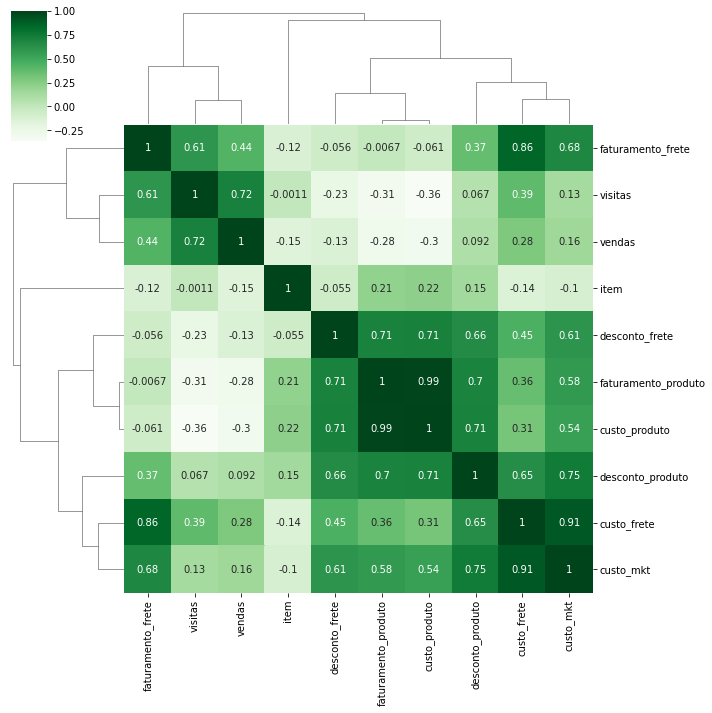

In [18]:
print('Correla√ß√£o entre as vari√°veis:')
corr = df.corr()
sns.clustermap(corr, cmap='Greens', annot = True, figsize=(10, 10))


* As vari√°veis que mais se correlacionam com 'vendas' s√£o: 

    * 1¬∫ 'visitas'
    
    * 2¬∫ 'faturamento_frete'
    
    * 3¬∫ 'custo_frete'
    
* 'faturamento_produto' est√° altamente correlacionado com 'custo_produto'.

* 'visitas' e 'vendas' possuem correla√ß√£o negativa com 'custo_produto' e 'faturamento_produto'.

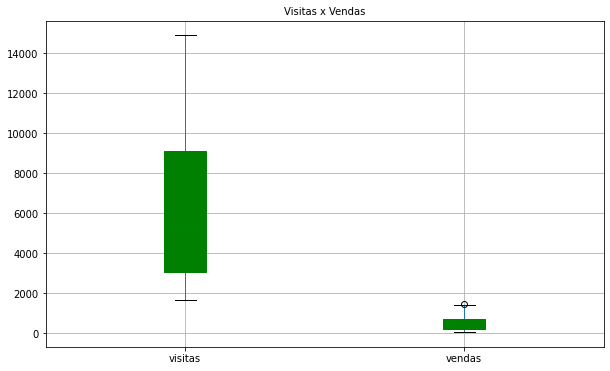

In [19]:
# boxplot
plt.figure(figsize=(10, 6))
df[['visitas', 'vendas']].boxplot(patch_artist=True, boxprops=dict(facecolor='green', color='green'), 
               medianprops=dict(color='red'))
plt.title("Visitas x Vendas", fontsize=10)
plt.show()

* O n√∫mero de visitas possui uma distribui√ß√£o bem ampla, ao contr√°rio do n√∫mero de vendas que n√£o ultrapassou a marca de 2000.

## 5. Quest√µes
[Retorna a Tabela de Conte√∫dos](#Tabela-de-Conte√∫dos)

In [20]:
# copy dataframe
df_ = df.copy()

In [21]:
# add calculated variables to dataframe 
df_['faturamento_total'] = df_['faturamento_produto'] + df_['faturamento_frete']
df_['custo_total'] = df_['custo_produto'] + df_['custo_frete'] + df_['custo_mkt']
df_['desconto_total'] = df_['desconto_produto'] + df_['desconto_frete'] 
df_['lucro'] = df_['faturamento_total'] - df_['custo_total'] - df_['desconto_total']
df_['conversao'] = df_['vendas'] / df_['visitas']

* Vari√°veis inclu√≠das: 

    * faturamento_total = faturamento_produto + faturamento_frete
    
    * custo_total = custo_produto + custo_produto + custo_mkt
    
    * desconto_total = desconto_produto + desconto_frete
    
    * lucro = faturamento_total - custo_total - desconto_total
    
    * conversao = vendas / visitas

**Quais os departamentos com mais faturamento?**

In [22]:
df_.groupby('departamento').agg({'faturamento_total': ['sum']})

faturamento_total
                                    sum
departamento                           
Bolas de Gude                  464448.7
Cadeiras                      6141458.0
M√°quinas Fotogr√°ficas        18826450.0

* O departamento M√°quinas Fotogr√°ficas apresenta o maior faturamento.

**E com mais lucro?**

In [23]:
df_.groupby('departamento').agg({'lucro': ['sum']})

lucro
                            sum
departamento                   
Bolas de Gude          111036.4
Cadeiras              -234484.0
M√°quinas Fotogr√°ficas  294780.0

* M√°quinas Fotogr√°ficas retornou o maior lucro no per√≠odo. 

* O departamento Cadeiras apresentou preju√≠zo.

**Qual a√ß√£o voc√™ sugere como mais efetiva para aumento de vendas, investimento em propaganda, desconto em pre√ßo ou desconto em frete e porqu√™?**

In [24]:
df_.groupby(['departamento']).agg({'conversao': ['max','mean']})

conversao          
                            max      mean
departamento                             
Bolas de Gude          0.154214  0.098590
Cadeiras               0.111834  0.058347
M√°quinas Fotogr√°ficas  0.151845  0.082038

* Ao analisar a m√©trica de convers√£o percebe-se que o consumidor visita o site mas n√£o compra, ou seja, n√£o converte em vendas. 

* O investimento em marketing √© pequeno ou nulo para a maioria dos produtos, mas aumentar o investimento n√£o far√° diferen√ßa na m√©trica de convers√£o se o consumidor visitar o site mas n√£o comprar.

* Uma sugest√£o para aumentar as vendas √© aumentar a propor√ß√£o de produtos com desconto, pois quase 60% dos produtos possuem nenhum ou um desconto muito pequeno. 

* Outra sugest√£o √© aumentar o desconto no frete: 35% dos produtos possui nenhum ou um desconto muito pequeno.

**Outras conclus√µes importantes**

Text(0.5, 1.0, 'Visitas x Vendas')

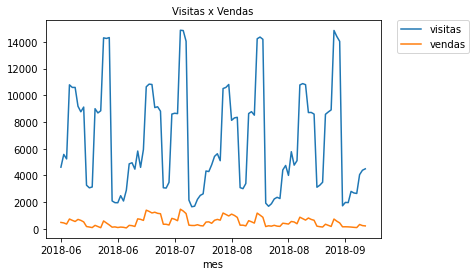

In [25]:
df[['mes','visitas','vendas']].plot('mes')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Visitas x Vendas", fontsize=10)

* A linha que representa as vendas est√£o bem "descoladas" da linha de visitas.

Text(0.5, 1.0, 'Faturamento_frete x Custo_frete')

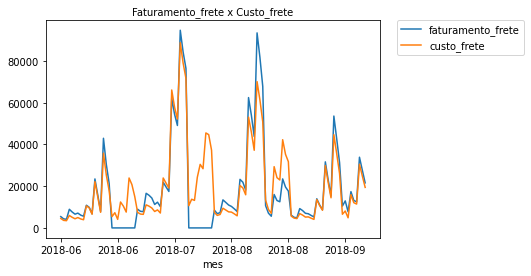

In [26]:
df[['mes','faturamento_frete','custo_frete']].plot('mes')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Faturamento_frete x Custo_frete", fontsize=10)

* A diferen√ßa entre faturamento_frete e custo_frete se sobrep√µe em alguns pontos, mas em outros se desgrudam apresentando ora preju√≠zo, ora um lucro com o frete.

Text(0.5, 1.0, 'Faturamento_total x Custo_total')

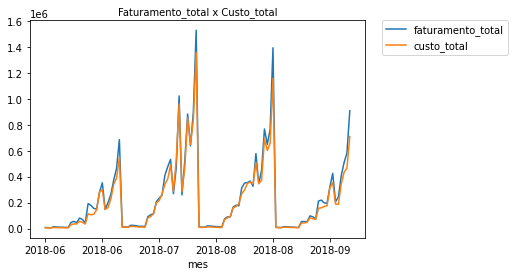

In [27]:
df_[['mes','faturamento_total','custo_total']].plot('mes')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Faturamento_total x Custo_total", fontsize=10)

* No per√≠odo analisado o faturamento com o produto tem sido maior do que o custo com o mesmo somente nos picos com maior venda. 

* Em alguns pontos faturamento e custo ficam par a par, o que demonstra uma margem de lucro bem restrita. 

## 6. Dados externos
[Retorna a Tabela de Conte√∫dos](#Tabela-de-Conte√∫dos)

* O total de vendas por m√™s apresenta certa sazonalidade. No per√≠odo analisado, o menor total ocorreu no m√™s de junho, o pico em julho e a partir da√≠ descresceu at√© setembro. 

In [28]:
print('Total de vendas por m√™s:')
df.groupby(by='mes')[['vendas']].sum().sort_values(by='vendas', ascending=False)

Total de vendas por m√™s:


vendas
mes            
2018-07   19520
2018-08   15991
2018-09   10484
2018-06    8648

* No m√™s de julho h√° f√©rias escolares mas tamb√©m coincide com o per√≠odo do inverno que se inicia no final de junho e se extende at√© o final de setembro. Sendo assim, foram inclu√≠dos dados hist√≥ricos sobre a temperatura m√©dia nos meses de inverno.

| M√™s | Estado | Minima (¬∞C) | M√°xima (¬∞C) | Temperatura m√©dia (¬∞C) |
|:--|:--:|:--:|:--:|:--:|
| Junho | MT | 18¬∞ | 28¬∞ | 23¬∞ |
| Julho	| MT | 18¬∞ | 31¬∞ | 24.5¬∞ |
| Agosto | MT |	19¬∞	| 32¬∞ |	25.5¬∞ |
| Setembro | MT | 21¬∞ |	34¬∞ | 27.5¬∞ |
| Junho | PE | 22¬∞ | 28¬∞ | 25¬∞ |
| Julho | PE | 22¬∞ | 27¬∞ | 24.5¬∞ |
| Agosto | PE | 22¬∞ | 28¬∞ | 25¬∞ |
| Setembro | PE | 22¬∞ | 28¬∞ | 25¬∞ |
| Junho | SP | 14¬∞ | 23¬∞ | 18.5¬∞ |
| Julho | SP | 13¬∞ | 24¬∞ | 18.5¬∞ |
| Agosto | SP | 13¬∞ | 22¬∞ | 17.5¬∞ |
| Setembro | SP | 15¬∞ | 25¬∞ | 20¬∞ |

Fonte: https://www.climatempo.com.br/climatologia/558/saopaulo-sp

In [29]:
# temp_media_mt = {'2018-06': 23, '2018-07': 24.5, '2018-08': 25.5, '2018-09': 27.5}
# temp_media_pe = {'2018-06': 25, '2018-07': 24.5, '2018-08': 25, '2018-09': 25} 
# temp_media_sp = {'2018-06': 18.5, '2018-07': 18.5, '2018-08': 17.5, '2018-09': 20}

# for index, row in df_.iterrows():
#     #print(row["mes"], row["uf"])
#     if row['uf'] == 'MT':
#         df_['temp_media'] = df_['mes'].map(temp_media_mt)
#     elif row['uf'] == 'PE':
#         df_['temp_media'] = df_['mes'].map(temp_media_pe)
#     elif  row['uf'] == 'SP':
#         df_['temp_media'] = df_['mes'].map(temp_media_sp)

In [30]:
df_['temp_media'] = [23.0, 23.0, 23.0, 25.0, 25.0, 25.0, 18.5, 18.5, 18.5, 23.0,
                    23.0, 23.0, 25.0, 25.0, 25.0, 18.5, 18.5, 18.5, 23.0, 23.0,
                    23.0, 25.0, 25.0, 25.0, 18.5, 18.5, 18.5, 24.5, 24.5, 24.5,
                    24.5, 24.5, 24.5, 18.5, 18.5, 18.5, 24.5, 24.5, 24.5, 24.5,
                    24.5, 24.5, 18.5, 18.5, 18.5, 24.5, 24.5, 24.5, 24.5, 24.5,
                    24.5, 18.5, 18.5, 18.5, 25.5, 25.5, 25.5, 25.0, 25.0, 25.0,
                    17.5, 17.5, 17.5, 25.5, 25.5, 25.5, 25.0, 25.0, 25.0, 17.5,
                    17.5, 17.5, 25.5, 25.5, 25.5, 25.0, 25.0, 25.0, 17.5, 17.5,
                    17.5, 27.5, 27.5, 27.5, 25.0, 25.0, 25.0, 20.0, 20.0, 20.0,
                    27.5, 27.5, 27.5, 25.0, 25.0, 25.0, 20.0, 20.0, 20.0, 27.5,
                    27.5, 27.5, 25.0, 25.0, 25.0, 20.0, 20.0, 20.0]

Text(0.5, 0.98, 'Temperatura m√©dia x Vendas')

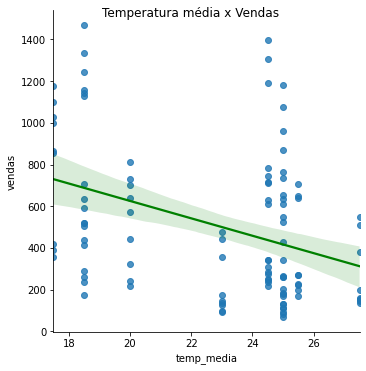

In [31]:
sns.lmplot(x='temp_media', y='vendas', data=df_, line_kws={'color': 'green'})
plt.suptitle('Temperatura m√©dia x Vendas')

* O gr√°fico mostra que quanto menor a temperatura m√©dia maior o volume de vendas.

* Seria importante saber quais os tipos de produtos que mais vendem no per√≠odo de alta. Desta forma, poder√≠a-se criar uma estrat√©gia de pre√ßos (descontos) para os produtos mais procurados.

## 7. Regress√£o linear
[Retorna a Tabela de Conte√∫dos](#Tabela-de-Conte√∫dos)

### 7.1 Multicolinearidade
[Retorna a Tabela de Conte√∫dos](#Tabela-de-Conte√∫dos)

Factor de Varia√ß√£o da Infla√ß√£o (**VIF** - Variance Inflation Factor)

* Se VIF = 1: sem multicolinearidade

* Se VIF <= 5: baixa multicolinearidade ou moderadamente correlacionada

* Se VIF >= 5: multicolinearidade elevada ou altamente correlacionada

In [32]:
# droped: 'faturamento_total', 'custo_total', 'desconto_total', 'lucro', 'conversao'

y = df_["vendas"] # target response
X = pd.DataFrame(columns=['faturamento_produto', 'faturamento_frete', 'custo_produto', 'custo_frete', 'custo_mkt',
                          'desconto_produto', 'desconto_frete','visitas', 'temp_media'], 
                 data=df_[['faturamento_produto', 'faturamento_frete', 'custo_produto', 'custo_frete', 'custo_mkt',
                          'desconto_produto', 'desconto_frete','visitas', 'temp_media']].values)
col_name = X.columns # column list

In [33]:
# VIF
for index in range(0, len(col_name)):
    model = sm.OLS(y, X)                       # fit ordinary least squares method
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print("R Square value of '{}' is {} keeping all other columns as independent features.".format(col_name[index], (round(rsq, 2))))
    print("VIF of '{}' is {}".format(col_name[index], vif))

R Square value of 'faturamento_produto' is 0.86 keeping all other columns as independent features.
VIF of 'faturamento_produto' is 7.29
R Square value of 'faturamento_frete' is 0.86 keeping all other columns as independent features.
VIF of 'faturamento_frete' is 7.29
R Square value of 'custo_produto' is 0.86 keeping all other columns as independent features.
VIF of 'custo_produto' is 7.29
R Square value of 'custo_frete' is 0.86 keeping all other columns as independent features.
VIF of 'custo_frete' is 7.29
R Square value of 'custo_mkt' is 0.86 keeping all other columns as independent features.
VIF of 'custo_mkt' is 7.29
R Square value of 'desconto_produto' is 0.86 keeping all other columns as independent features.
VIF of 'desconto_produto' is 7.29
R Square value of 'desconto_frete' is 0.86 keeping all other columns as independent features.
VIF of 'desconto_frete' is 7.29
R Square value of 'visitas' is 0.86 keeping all other columns as independent features.
VIF of 'visitas' is 7.29
R Sq

* Todas as vari√°veis independentes possuem VIF = 7.29: alta correla√ß√£o.

In [34]:
# delete high correlation columns

threshold = 0.8
corr_matrix = X.corr().abs()
# corr_matrix.head()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# upper.head(10)

# select columns with correlation above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
# to_drop

# drop columns from to_drop
X = X.drop(to_drop, axis=1) 

In [35]:
print('Vari√°veis do modelo:')
print(f'- Independentes: {X.columns}')
print(f'- Dependente: {df.columns[-1]}')

Vari√°veis do modelo:
- Independentes: Index(['faturamento_produto', 'faturamento_frete', 'desconto_produto',
       'desconto_frete', 'visitas', 'temp_media'],
      dtype='object')
- Dependente: vendas


### 7.2 Modelo
[Retorna a Tabela de Conte√∫dos](#Tabela-de-Conte√∫dos)

* 'faturamento_frete', depois de 'visitas', √© a vari√°vel que mais correlaciona com 'vendas'. Portanto, ser√° utilizada na predi√ß√£o de 'vendas' com um desconto de 10%.

In [36]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercepto: \n', regr.intercept_)
print('Coeficientes: \n', regr.coef_)

# prediction with sklearn
desc_faturamento_frete = df_['faturamento_frete']*(1 - 0.1) # 10% de desconto em faturamento_frete
pred = regr.predict(X)
# print ('Predi√ß√µes de vendas: \n', pred)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercepto: 
 677.2636737628425
Coeficientes: 
 [-4.39238056e-04 -5.25701758e-04  2.79424455e-03  1.48795009e-03
  4.78781829e-02 -1.94785581e+01]
                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     21.04
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           7.05e-16
Time:                        03:16:54   Log-Likelihood:                -743.69
No. Observations:                 108   AIC:                             1501.
Df Residuals:                     101   BIC:                             1520.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|

**vendas = (Intercepto) + (faturamento_produto)*X1 + (faturamento_frete)*X2 + (desconto_produto)*X3 + (desconto_frete)*X4 + (visitas)*X5  + (temp_media)*X6**

vendas = (677.2637) + (-0.0004)*X1 + (-0.0005)*X2 + (0.0028)*X3 + (0.0015)*X4 + (0.0479)*X5 + (-19.4786)*X6

R-squared = 0.556, ou seja, 56% dos dados se ajustam ao modelo de regress√£o. 

Text(0.5, 0.98, 'Faturamento_frete x Vendas (pr√©-desconto)')

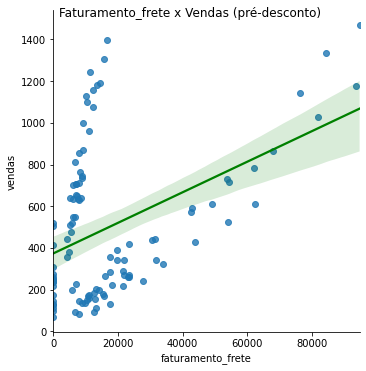

In [37]:
sns.lmplot(x='faturamento_frete', y='vendas', data=df_, line_kws={'color': 'green'})
plt.suptitle('Faturamento_frete x Vendas (pr√©-desconto)')

* √â poss√≠vel notar que existe uma rela√ß√£o linear entre faturamento_frete e vendas.

* Sugest√£o: diminuir o faturamento com frete para aumentar as vendas.

In [38]:
data = {'desc_faturamento_frete':  desc_faturamento_frete,
        'vendas_pred': pred}
# new dataframe with
data_pred = pd.DataFrame (data, columns = ['desc_faturamento_frete','vendas_pred'])

Text(0.5, 0.98, 'Faturamento_frete x Vendas (p√≥s-desconto)')

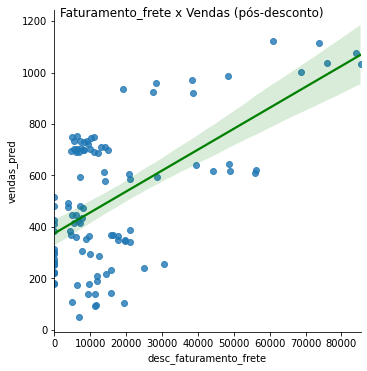

In [39]:
sns.lmplot(x='desc_faturamento_frete', y='vendas_pred', data=data_pred, line_kws={'color': 'green'})
plt.suptitle('Faturamento_frete x Vendas (p√≥s-desconto)')

Text(0.5, 0.98, 'Vendas x faturamento_frete')

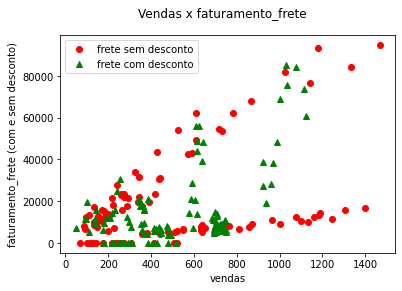

In [40]:
plt.plot(df['vendas'], df['faturamento_frete'], 'ro')
plt.plot(data_pred['vendas_pred'], data_pred['desc_faturamento_frete'], 'g^')
plt.xlabel('vendas')
plt.ylabel('faturamento_frete (com e sem desconto)')
plt.legend(["frete sem desconto", "frete com desconto"])
plt.suptitle('Vendas x faturamento_frete')

üí° Diminuir o faturamento com frete permite aumentar as vendas.